In [6]:
import nbimporter
import dataset
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import os

In [7]:
model = dataset.LeNetColor()
model.load_state_dict(torch.load('lenet_dataset-1.pth'))
model.eval()

LeNetColor(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 18, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(18, 28, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=700, out_features=360, bias=True)
    (1): ReLU()
    (2): Linear(in_features=360, out_features=252, bias=True)
    (3): ReLU()
    (4): Linear(in_features=252, out_features=100, bias=True)
  )
)

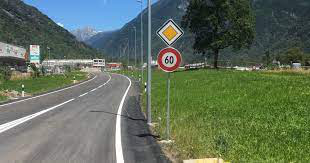

In [8]:
import urllib.request

urllib.request.urlretrieve('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhUYGRgaHBocGhwcHB4eIR4eHBkdHB4cHhocIy4lHh4rIxwcJjgnKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QHhISHDQkISE0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAKMBNgMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwABBAUGB//EAD8QAAECBAQDBgQFAgUEAwEAAAECEQADITEEEkFRYXGBBSKRobHwBjJCwRNS0eHxcpIUM2KCsgcjc6IVg8IW/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAJREAAgIBAwMFAQEAAAAAAAAAAAECEQMSITETQVEEImFxgTIU/9oADAMBAAIRAxEAPwDxCJxQdeP6Q2VMDMb9ItC0HurDD8yWccNiOBiYnAqQHBKgfqal+Hy8vWKRA6VNWgghTcjfWu/KPR4Pt9CgM4KTuKj9RHlUTqZVBiPD9DziOWoCQDUsacztGuPLKH8sznjjPk9/h56Fh0KChw05jSG5Y8PhMQqWsLTQ13YjYiPVdndsImAAqCVn6SdeBN47sPqIy2ezOXJhceODdliZYdliZY6LMBOWJlh2WJlgsBWWJlhuWJlgsQCRFrqXgssTLAAvLEywzLFNBYgMsDkYiqr2ckWOht0hrRy+1O0Qh0IPfAcnROnjWJlJJWy4pt0jRNnBC1k/TLcgXbOD9o8/je1lLp8qdhfqYvATcycQa/5dSbkvcxxZi9o4ZZG267nXGCSXwGubX0EKSCTWBEMQIzbNKNOGwainP9JcDj7pGPthaUpb63uLZb1a0aZKWqFNV/3jk9qzQtZYJtlGWjNUvv8AvGcnsVExKxDqPEN797QUvEh341Op0hCyBox4QIRSMeCzROUhVQQ/v31hchlFiWHvaBlyyakd0a8IKWhwK6nxge4G9JSpGRNxq7PbnWAStgxqzjjXjFYYs9qbajWJPUKFgfQa63/eI+ANImUdyRx9tBpWzkbBm2IjEhatK8OX8xuQHAe7DheHF0xMWt93eKCmhhI2AgQDGtkiiTBBUHOQxIGh90iIQks7jjfyhjFtBoUNXgv8KopcWqfAgfeEt4QAMWU6RIQqvKJAFG5ckCo1O49nrFSZivl+kn3rSCmpdVqXp6uIBaaH1/eM0yhn4Q0BB/KT3W1pdJ1gFS1IJZuQrBSHFBXZ/NvYghUs1W0B84eoAkLzXcq0ttxpC0LG78RQiJMcMRXdjaukEqZZ/GHYM9R2R20QQieqv0rLdApqdfGPTqkqABIIBsSL8o+Yh2JGvHz14R2ex/ibESRkfPL+XIoO13y6pPlwjqx+pklUtzmnhT3R7NojRl7O7UlzgcpIKWzJVQh9eI4iNa5yQH6e3vHZ1I1dnNoldUU0RoGZiBpDQpywBOtK0doXWjdFdGVWA0Vlh+QtmYtu1PGFKmoF1Dxi9aM9L8A5YFagkOogAaksPGM+I7VlIup+UeX7a7XMwsO6kWH3PH0iJZVFFRxybN/anb4HdldVt/xH3MefE0qzl3JS5/uTAygCWNiWu1dDaJhkll/0H1Ecs8jkdMYKPBt7HLoxH/j+5jmqSP4/eOp2Qe5iP/H+sc+VKe5ZIZyxNywASKqUTQJFSYys0Jh5DuSpkhipRsHNOZNgBUx1cZ2WpCUEyloWoOkLIOcByUsB3JgHeyF3FiSkiO92N2QJASual5nzS5RLhD0zrIuvjpZOpjpzFBaVInutC6qNihQqFoIqlixpZnGr8uT1eOE1BvdnRD08pRckj5fjpgCSC9ab8eEcuY1SLJFXer+lY9h8SdhrCsqi6qqSoANOSA+cAUCwPnSL/MNRHk5mHIQasSa0vw4c41bvczW2xzys/tDJcwCpD9d4gRWh96fbxghLGrvzHpE0M0LWSQQAkGg15iukISnvEC1OVn06wSqJ74/p53rD0S3Qk2LVrfyd/wB4VUwHfhMkKLV0TrSh5wtCHICrCoqzkixozXv94JC3oGpezOYWpJ1HAl9/T9oUkuwGuTLBoARRw1WFK1g1hnBoNi/H9RGBCmLLBKgDrbwjbLn5xSnAV0a5ro3WIrcGAmCz2+0U0GUM2sdBJFJcOxcXvaBBaw8YpKtusM/EfQP4QgJLURVJ6Nwhc1bm2vCKmT/yhvf8xbvy0qXvSAYIQTZqc/tEiGZs/SkSADc4BtaxgixFGJAFBS/DePZ4r4WlLBy5k0Nhm00F/OOYr4VmorLUFmh0duINozoqux5oyzrTi4iA1a9Sz3pHRxPZk5JJUhiDR6X4Fn6PF9ldmrxExEpOQKU7FTgd0E1IBOm0MRiCNdNtYNaRTbje0dz/APlcRlJ7hZKlHvKFEgE/MkaRwqkgJAqWDPV269IQNNbMShDHX3ttBLSDV/GHKF3oR5cG0gMg1N+H7wWICTNWlWZJZWn8x6fs/tRUxLLDEN16aR5dUogulyG3B9Ybh5hBDKLvfnp5ecaxnQqs9oqaMoLkUam+vvjCZ3a2Wib6nTo1X6x5oYpaWzEqSfI7QZxIV8tN43jKMiJJo3zseoklSiSffSME3FHcwpSoDM1dYpyrglKwJ8zjC8pPsDzirnjDEIqQXpc8NYzbKSAlDvJ/qHqIbhkkBR/0H7RJQOcf1/eGYcfO/wCQ8btCYUa+yB3MR/4/1jPgMVkWCHDEFKgxKVJdlJehZy4NCCRS409lfJP/AKB6mMKmHExDY0e8w+KE8FaQPxQAZiBUKTYTEPUijNehSe8KnJSV/KQwDqWflSLueLaegjxvZmKWlacpUFAkoIDlJN+79SCwCkagCxAI7PxFj5xQEqliXLLFSUuUrWakqUwBD2SQCbq/LHBl9FjyZFN/vydmP1E4w0mb4g7bQoIly/8ALQQpBNVKUHIXX5UB3ADFV6IYL8sVC2UnSsPCHJUasaubkn2YVlofXzpHakkqOZtt2zmY9YSRQg3pq9z5CMTU22O7w3HzMy6WFOfOMpJMJsYSKu3D12h6VFTBRtoduAMXh0pALuVbWHOsaDiKMABQEsBTrd/tENvsACVMQUskpflsbnWJ+I4JUDwOjtUWv5QaZKlNl0uagXpVq9IUs/MTXQ1hUBSEuRXrtS8acI+aqbuTwiIQMtXAI0v14a2huCklnvtp5np4Q0rAbkrz4UhigMtQGt/MRCXFbjzp6wClPSu/t40JKsAx0qesEUlIfzOgiyQnifekAldR5NCsYIlNXbdm4NCpiC7kggk2jSpZ2c19vpAlNO8Gto0LUMQAfoLb+9oqGCY1KcvvEh2I+yf4YhBS5diAXc1e5py6QuXKWlOZ3WA3MA0APIC76x8mOLmAtmU96ftBYftSak91agb0JB8iIk072fWVrJSkrclTClakWLBuHOPP9l5Bj0qBCUArGgA7hBL2YkR5qR8W4gUK8wGigFeag/nHS7ExyVTkKXkQkupRUpDJYqJdLuEvRuMLuvAPaLa57H0ifiEZFjMkjItjnSfpIbfwf7R8aUsE3q4b7x9UxC5K5ZAnSS4WEZUi4BJCa0NI8L2T2FnSZq1gAuUhlVAd1UBG/u7lVe0xjrb9yo4q0d7M7kgXUST3RqbxSnZrax7VXwlJUK4mujIUHy0oSlqtFI+EJZHexDC/yvRtWDDXwhfZelnjUJeug+8UuTtrt7vHtV/DMlyTiiXOxc6VKgNvOFK+HsMGKsSz2oAatfjC3HR45JUNDpS/WBatmJ849xK+FcMpz/ihZ7aFqGm9Iz4v4bkoTmRNVNKRRFJTnMmv4kxOUUUaNWlYaYtJ5ULdn21bThFLDmken/8Ag0EgiUsBSSe7PkqDgqGUJyuXyioLd7gY4+I7Om51oly1qZSkhg/yqIq1otTa5E4HOyXOzxpWhkkbq8tvFofM7OnguqUsCrOlgYRNSQopUCFPV7w3kQtLRUpPft9QH/s/rEw8v5n/ACKikZgvRs33i8Igqz0+lY/SDWgo09mDuT2/J+sc+VKzEOaVJN2AqefLWPRfD2FUlakLTlJCKKDUKiBQ6RO0vh9cmWtedKwAgHLX5u9Xll9IUpUrLxw1SS8sydldnTcQ4l9yWKGpA5Kaq1a1pyjdi+wsRIQVoXmS3fSlw44oLhY4Hwi0zD/gJaUEJSpahMJSpQYBa8qkpIJC1JQi9ltrGrs1ROLKilSVnOZgLslH4cnInZs2ZuIXxjJRtW3ud882ibgkqW1VyeWxElKwFp7odlpFkm4Kf9KmNNGPCMwQRs20bUAFU3L8hJy/3unyeMM0tcU0ioSbW5zepxqGRqPBz8Rhc2ZkgV3Ymw9H9mM8uRlWUliAASQddhrHURIWtmSovZgT4sOUOT2ctIVnlkAhTFQKapIch7tWKtGG5wZ6AU0SQQ/s6w7AYUZASEkknQE0NIdiZaUIIqKfeG4Rsib2pQXNd4VoOwwV2r76wn/COa1fp76RsQgEZv0r5v8AyIiV3rA2hULEstQA8/QPESwDCghyFk3NdLikAU106EejwtSHQFzvyhSFnMUMzA7PpU6Q5cs5SAD4WjOhDKGpbTrfhA5BQ1KEgA0Nfv5RFuA7dAadY0TezlLKEoWgqIJKczaZmHpHOUtxbmfdoTbHRozGxAGzM3jESAbqqH/iMsjCzFnuIWt37qErUoM1VAAsO8KxqV2fMQUqWhaNGWhSNNM14imtxilSFaesSDk99SkukEaEqHB4kVrkLSaU4VBqH8wbG29duMbUdmy1jMFNMD9wIUoFhQlWYip0YxlxCQ6S2XWlhRmra8drsWXkRmKtQ3dFQOHj4RHUpWVFWcE4VAUcySkmvedItXheO32N2UhciYsKGYEJBTloGJusOC5HykEsxpHTzSqOArcKAIdjRj7pCe0J6FIIShCcwFkihoHLcoHmTRTiu7MfYfaM2SpchaEnMoMVUYgEBQUeDeAtWG4btKYuYtJIFQHUQwcC5Ys5LvxMcTEIUsu9imhLOEuDY2tGxC2UV5EklIDaUs9S4tThAsiXJm38np5uOmBOXMjMqxRl7oUR9SLVVbYxeKlTMoUhalBSSGzWIUxejkV3DR59GKLlYCUqYAAJDU46Gg/aGDtFZZ1JLOA6Qb3HB7Ug60R6kAqZMRMCSosVEM5OjUL1L+kFjJa1kZkFQGU3a1GL/wAQuYsklmIuDz04tvrBpWkNRK6VYqGUvbmzHUViHlfYV0ehwvYaF5FLozlQSsF6Bg4okhWzvD8H2N+GT+HOKS98qFU277jQaaR53DrTmfIyeZ9SzCOoJhUokK/7f5yCB/sBqTwBPHUxcJORon3NvaEzEISGnBdQn/KkkVSdAl6nppHJnYVKlkqmIqQVKDVBLqavPSkaPx73I0faDlrzhQ2BVuKbg725kRo06C2naM8tCEBZ/GS5DfUcvFkpFam9KRxMTIOfMl9d2JFfv6R21gGhQndmb/i0CcIhdAchc1NRXc3A8bxDjLtQpSk+XZkUZZNJeQuaOo0oyu8TY+sBgglC3fMA5YuHYPVtOsNxWGKCUKcKcFqNY66u9CC0JSihLGpWApw3yOzXfV7VETqknujNv4NQxSphnLcA5AzOyWKrPXxjn4TErzAzJi1JDgpc5S4IqmxvGrAik3+geqoxeEE8jUV8hGdOzd2YmdLJVhjnSalBYqpuhwSf9Sb6taK7U7XxK0FK0CSg0UVAofhmX6JrGJSuNIWiSAKpGblW73jPX7Tp/wBd7uKb8jcLMw4RlUpatSULSHcbFCj4GMqO0loUyELKASwShCCQygBnUkks4uC7HeNLxMvjyhLM0c8sspNt8spXbOJWUjLMSnLlLzEi7apQGDAcaQiaZxKSAjMMzqLqKsx1K3dn84eSoaMOUVm41FYHmkydTOdisItaCkpS5NVAtt9IDQOFw5CAFoFKOCoOwZ6uI6RBZ35+2iZTxL+sHWYa2KlS0BHyd5yU99g4tQor46R0uzcJhigichaFFiFhaleCUoYAvq9oyFF6VDa/v7aAmKAtb9YOtINR2pnZGBBQ2IUMwNcpITQs/dBvTrGHFYDDyyHJmOFNlBDGmVRL24eWkZETE1pyP6iJmbUW1FKCDrS8DU67GjE4FGYCQvuEEKKwUqNbBnGX78HhJ7HOjrOWpoKh6B2ca/paKStOrNepNKcPSDzI2N/zXvvClmk+w9SfIWG7OWMiyhyFOxLs3Gt/vwh+KwoC0hKJOUUbmSWJzElsx59YUtKGopQ0vT+IT/hkqJGcu+17CkT1ZD1R8G3CYXLNK05UOBRJYO1S3PSOh2rgxOSAVWY5STyNiND7088rDh6LNPZ1tDErKQ4Wqlfl4fz5RXWlVWPVHwLlfDeYqKkJTWhKl1fgFFokMm4stUqIJd/2PWLg6sh6ombEKCjZhduvKKAI38aR3ZWElugpCVgaLJFCW+m/I7aCNGH7NkuUzCokuxZmo13IJps0NKyenLk4+Cwv4i0ozBJU/eWWSGSTcbs0ZAkR38P2FLm4j8IqUUEkK+lVA9HDEZgztGOZ2SoVAdN3ZqX+lx5w3HYnTLwcsb09YJKOPlGlMhLt3iXZgD7Mb0dnrYPLyAWKyEdcp7x6QKEn2BRZzQjmIMSTR6Dfle8dJODSKqWVcEJYf3rqP7Yt0JPdQl91utX/ALd3wTFrD5Y1Ex4aQpR7gUpjdINOarDm8dabOWpCULKAEhgB/wBxVyXd8r13jJNnqV8yiWs5LDkNOkLK9I0jiiuxa2HKmJ0QCd1so9EsEjw6wEycol1Kc8S/TlD/AP41YrMIljQKfMeSB3upYcYvDTQgd1Kc35lByP6Qe6DxYnjGiQrBRIJTnUQlOm5/pTc+Q4w1c4AFCAQl3qaq2zEeQ0fW8Z1kkubnxMUhBJhgTOSaQ5LgExEyxHW7Fw4dU1YdEoZyN1fQnqqvSEBg7fSUiWg/OiWlK7FlFSlBJ4pSpI6NpHCTPLsdHpQCoZ6Uf9BHWxiyslSi5USSdyakxyVSgVfMmlSHYs+m8RP+WDRtw82WtMxUoKCciQc186QQpuGYFo5zAXfn7EdJGKz/AIrAJaWhIFqJTlB5lnjmKVWtTxjnzNUq8GTKVMoaaXhuLX3yKP3fID7QhXAe/ZjXP+dTcXjFP2/pJkCvf3hmcnVhQBtqvTrBLQBpp9v3gAjl7bWJArf3w9ItLi1Of6DrEA4D3/MWH4U/UftCsYISBVVSeMWlQcWDO+2sEsO2/wCkAZadX4+Q1gArPU+u8BcM9m/iHKUk2GoYcNre3gUJNWF+Au/ukFiErlpcsd6wf4YGgUOIHP8ASGJS4VlFmJ8ePXjCFTMtr/x7eHdjGS0jZq7c4rMgUZzV6vccYFEws1aDw9gRaJY+YjiG1prtQwgKAApU605REqoS3yv/AC73s8GlZctpX+IBaCQ/U+XvwgsCwlQDqCmUGFdhv7vESoguXPAjTmRS3lDFpBa5Yedz5tBIOZwVZU6uP0rUtbaCxi1Zm+SgLUDl71iQ9C0AuVVtlBIItwt+sSDUAxGRJHeCquAkFXSzR2JUycQM2HSAPlVMJRTgSoE62MAnGrFEMgbISEeOQB+sIUpzU1j0YwijZKjWsnNmVOCDoJQWSP8ActQ9TCitAPyqWd1rUfAJyt1eM4UIpahFDNJxixRJyDXIAh+eUB+rwgrF4Rne0dXB/DWIWMxTkRqpZyADetW6Q6FZzFTOMXIkLmKyoSpROgBJ8o7Rw+Fk3UqesaB0o/uuro0ZcR2tMUMiQEIP0oGVPVqq/wBxMFBYJ7OQj/OmB/yS2Wr/AHK+RPiTwhClDM6ElA07zkccwAryAiJQYaEbwxCUh7uSfd4Ip4Qy9B4wtU1ALFaX4mACJQP3izsIr/FI0UnoRF5tRAAado7PbavwMNKlfUt5q/RIPn1TGPsbCiZOQhqFVf6R3leQI6wn43xebETP9LJA4JFfNz/EJAeXxMwlz15RcleYqOndB4NetozzLa+/SDwBBUQbFJO1R79IU17WJHQwgrMb8gbwVCSQKnk4huAT/m/0tfgdYQQndyGeupdj5RyZVsvolooL2Ac+kOxSjnWNifvT0gUyqAvUkDp7MMxiSVnbMfKsZV7f0mhGegfr40+0AVEHcmv8RaUcNH+0QoNx78b/ALxAqLoL8vtvFmyiGuK2F2ilJrahO3l5RFEuMpd9xtvw4cYAoJYOp4cK9dYvICdnbWjPpArn0yhLkO5qbDZqQImOx3u70/R4KFQwS2Da6cm9+EWgJBc1Iemjij/eBmLAoS9zR+lGe3rAzVguC71twrp49YVBRHdmFDtxpClIAGr+TxCsEjQmw5a+RvBzEZtWFHrzFuo8IdARSNE1s7089dDBJULPrToN+l9gYUtFGci56e2il10DA6PzdtbEdYKAta00ANftVhFGeQ2guRWjGj+URASQDlOxaw1o5tR4FS81ABbQ3I04g1LcdYKAiJ4YJJYi7gmx2g5pJqA4JYMw404AxU5BBcAMGB0atO9bR+sNStGUlQqQ9wL1ccHo9L8oYxKgRVnf0FNIkFNQE0YkaDhdw1GJJiQ6A7Cl8ffSAK49ng/g0JYzpl/pQGfhmUHPRMdYYXDYYZsqEbKVVR5Jqrwyx6ZseFwPYuImsUy1BP5ld0eKr9HjtyvhNCE5500NwIQn+9Qc9EmNGP8Aiy4lJ/3LqeYTYcy8eZxmNXMVmWtSjxPthwgA9Ce18Ph6YaUlSvzqB8sxKj4gcI4mO7Umzj31KVsLAckikYkIJjZLktvCsYr8AlnLDaGplAWEWUNcv1gVKpCsA6C5rC115QCEPV4YBDAFR0AiJMGwaIlEAhaU6mAVKTdhzFPMRoWatpCZqtIAO78D4cqnqUFKGVBaxqVAfUCbPrHkviKYv8VajlPfUdvqJs5ePefACKzlcEDxzfpHhu2Q6luPqV6w0DPPTMWhyD3NgungTQxUvFJBBC0uP9Qr4RoAB5e9IzrQKggEHh9oYjuYKYFGYpLVQC2xKS48YrDS8yxUByKmgerVuKQv4Y/CSVoWFjMD3ktSjWI846WLkyUlklR7pL5id7paltTHNmS2HV7iZSMq8rgEKY62JcBqG/pCsTVShuS1DqxPp71tAOcFqOLcS79aQ9ZynMS7kgDhag0vHM/5/SaFSJJZ2dh5PR3hOInAfLWpNbabawxQIdqjfzHrAfh94XrUf234aViNgozrdQAB+nx993ziCSUn5myjNepqWPGsaEAJNaChD8Tp6xRWksqtqs/Pq0MTRmnS0mtQBSrl3DUazP62ihLPUsRTSof1jXPDKAAoxLFgTfaFS1qABTa1aDSv86Q+wqEKlKd7sNdta/eLOCVoLm5fhwoIbMJcEVIGUj7l+Bi5C8uU5SSCWrZrDiS51uIQqESpZYhiCzcNXrpaDQtzqyRU8yKtpTY6Hetv3mNAUuwalTvoL9IegoSkJKWKjYaNZiTQmrHgIQUImrQ5ILioIqGHg9XudjEQEkM/1UOtGL1+/GGTUBgHYgHR7XY6lg9YXPkhOVlkOl2HMMW3Dgts/UQqFIluoZVd2gJqGLsaWG/S8H+IErSwBqUngGdiRzHgIaiTlBJTVRAbQk0UHvr/ADAJw47pIZ/qNKsxLih18oLAL8PMCFq4jk4tszjxHGEqwiio5asLE2DCr0q9fHhG7DrGViovxSQ+zEVIonwMIVhlJAGZ3V/UGZ8zg8YVsQkSgbkMHFMwrTi8VFTkEgUJ1a7UAuXe3FnZ6RIqwPoGO+KFlxKTkB+o95R6m3SPPz8QVElRKibk1PV4AJeGol8I9M6BQSVWpDU4UC8PCYtQibApCBBKVpBBEJXMAhDKXM/mFBLwBW8MS/SKERKDFnaAUuJnpAA0DSCUnWKlwU4NAAkqYRkK6+cOmKhCaqgEe7/6fp7s08UDwCv1jwvbyDnmD/Wv/kY9/wDAo7k3+pP/ABjxHxIhp84EfWv/AJGBAzyySBenveM8/GSwaqBHU+ka1UJaBXhkLLlCSd2BixGPC9qoStKgptDSkd9WIQRmStJB0BDCrDvPq9Y48yWEGgYUpDMJ2ahaz3UAmozEgPwKaj04RlkimrKXg78qeGF3cPwDv+kMmodYo4BLX1Jb7eEapXZCSz4mW7A5AFAADTOa6aiDxmFQhwicFliR3S9T8qSDUVvwNBHJKPtoaW+5iIADG7+Q/mBXq4a4pS7faFLIdLXH6vT9YpBJRq6qcXp9vSMaCg5wBFtumv8AMLnKFArdvG1X8jdoIL79S4BPhZ7w1eUks5zF3azaetoCGZTZKgHLKaj30HifGLkpTR0ku7nS4IL83h04kOQKh6FqhQZVSXa9dxHIXiASos2RIfUM4PrtfNFRjZLOljEGwALOKXcHKzcgocho0Z8gIAymtGrwY9C0HInFQSoKL3PN+7e4o46xcwdzMFAEFyNXUKFja5YftCewhK8zi6gBz96vyhE8171PlsRQEUNLXduIjQhGdZtcKuW5U35axctAcZsoKmJcFrg0bpyeJsQp86iXBLmlG4W5Cu8TKpgygGNhuXfWlgH5bQC0HOpKAGBNQLgF7Dl7aDQmgKjp3SaXegPEHzEMCsTNdiFFw41r3QQp63Jtw4w5SEhBOZJUKkbd12zZmdwmw1MZZoUTmDhTV13enK8CRldSg7Fr0cux4ftWHQAzlm1XuQSS7E24OSYuXNUpTOSG3IaoZIJ6Q8FDkqGXu61Z+8KDgGY68IzokhJdnFKvqwVvwPlD2oQWIbIl87/7TpZi213rSkSAxJzAHQMKs9tH0obcIkKwPYBAgwNoMIg2j0WzoSACTp4xEy2rDCpoyYnEE0hDKxE7SMK1vBLW/u/7RSJTmKEHLS8MbwEElGnv+INx0gEKTLo5iSw5g5jmntosoADDrAASFOX2ipi6nhCwoikAtd94AEzF1hMlfegjeCwyamAD3nwIvuTRsUHxSR9o8v8AGkrLiZga7K8Ug+sek+A196aN0yz4Zv1jm/8AUCS09KvzIHiFEejQIGeBnAA1BgglLO/nDMaKGOehXCKJNeJSGoA+94xS5ynva0aUVEZp6MpfLe0ID0mDAWgEvVnIY5W4aabwKUVJLlPygE7M/S3gIw9lY0IUKd03YtxsSRv4x3pi3AXLDoIJIa+3L945pxdmsaaMQQ9AWcs1iHfUniQ9oXP7rjI9uLl9NOo3iKUsrJX4Dneh9tBrwi1vkSpVBlTWlXKn3FPExg47hRnTOSTQFn7r1NwwNq0bmY0orYEda1ILO9BrBYTsucWH4UxwanIpjVnt7EdIdiz3dMtbioBptuR7EZtUxaWzkz8zkjLTUfKQQQ3Qt7tjTKyIAUjKqmmiWuK76UpHol9g4osUyyCbgqQ1b3V+7xnx3Y0zIvOhRCVB1Pmbu94KBBBAOUg6NtDTaJlBnCw0sEHKSxA0NsoNSLAE26RsXNCDUZS4LXzUcncVFuV9Qkpyvmo40poGY6DXRmiYhPfAOapAB13YNrUjeukTKVsigFqQoO2UuS4DBwLEUrYcXELnS81QwLgipocuvAEQX+GOV8tyGbSpc32bbaDWStis901zCj1JDgUe1OULgkz4VIGcubqHQJNevCGYiXmSC5uQkMHYqoejRF4ZgFIFANKsbm9d/wC0dSRhytDoNVNWtPpLPoP0gvuIzIcOEs1b3cp2uQ78qwDB3TS7u7M58Rv03jWnDKCiFkBipTUtZm0pCZsv5CAoAuNnsOlQB47QWAWJwqS4Q5DPe6WGUgGr1rFGWWOXi9bgB3NLaNvwgEL7/d7wJSTt8tBawqOkRJIBSKFw6aMwBJ6XgQFywFOkB2azgBgzMCLu784kGqQcoIygnW5YCo14eW8SC0B6xULmFknlEiR6Z0C1fKY5ytYkSBCGJEOl/KIkSAAlxDEiQCInXl+kEBQdYkSABare+EZlWMSJFAKTeGSb+MSJAM9b8A/5i/6B6pg/+ogpJ/8As/8AxEiQCPAYmx5Rgw6AdNIuJDExiYy4vTnEiQCKkq7io7fw/NU6kuWYU010iRIjJwXHkpUwpnoYt30esfW02ESJHOWLNxzhhv4feJEjin/bNVwDiDQcx6xzsCXRNB/Mr0iRII9/oHwcftjs2VLlLWhLKFi51I4x4haywr9IPUm8XEicXD+znnyOlVCg5bKSzncRqxFEBtSrjZ94kSNXyYiUTC4O4JNB+R4PELLEPQKDDmR+kSJEvkAsgKM5DqGcP1B+58YydpLJyl9VegiRIaA3rkpRhwtKQFVreyl6Gkc1H+SlWpUa+IiokJDZJI+Y60Hr+kSJEhkn/9k=',
"sign.jpg")

img = Image.open("sign.jpg")
img

In [9]:
transform = torchvision.transforms.ToTensor()
img_t = transform(img)

In [10]:
pred = model([img_t])
print("Faster RCNN predictions: ", pred)

TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
